In [1]:
# Matrix Manipulation/Management Libraries
import pandas as pd
import numpy as np

# Statistical Tests, Machine Learning, etc. Libraries
from sklearn.preprocessing import MinMaxScaler
import igraph as ig

# Miscellaneous Libraries
from typing import List

In [2]:
# InoueKreimer_alpha_MPRAnalyze
alphas_MPRA = pd.read_csv('/home/wbd20/Kreimer_Lab/MPRA/InoueKreimer_alpha_MPRAnalyze.csv')
splits = alphas_MPRA['Unnamed: 0'].str.split('[\[\]:-]', expand = True)
alphas_MPRA['Module'] = splits[0].str.rstrip('_')
alphas_MPRA['Chrom'] = splits[1]
alphas_MPRA['Start'] = splits[2]
alphas_MPRA['End'] = splits[3]

cols = ['Module', 'Chrom', 'Start', 'End', 'T00h', 'T03h', 'T06h', 'T12h', 'T24h', 'T48h', 'T72h']
alphas_MPRA = alphas_MPRA[cols]

# InoueKreimer_temporal_MPRAnalyze
temporal_MPRA = pd.read_csv('/home/wbd20/Kreimer_Lab/MPRA/InoueKreimer_temporal_MPRAnalyze.csv')
splits = temporal_MPRA['Unnamed: 0'].str.split('[\[\]:-]', expand = True)
temporal_MPRA['Module'] = splits[0].str.rstrip('_')
temporal_MPRA['Chrom'] = splits[1]
temporal_MPRA['Start'] = splits[2]
temporal_MPRA['End'] = splits[3]

temporal_MPRA = temporal_MPRA.drop('Unnamed: 0', axis=1)

column_names = {
    'statistic': 'Statistic',
    'pval': 'P-Value',
    'fdr': 'FDR',
    'df.test': 'DF Test',
    'df.dna': 'DF DNA',
    'df.rna.full': 'DF RNA Full',
    'df.rna.red': 'DF RNA Red'
}

temporal_MPRA = temporal_MPRA[['Module', 'Chrom', 'Start', 'End'] + list(column_names.keys())]
temporal_MPRA = temporal_MPRA.rename(columns = column_names)

# MPRAAnalyze
MPRAAnalyze = alphas_MPRA.merge(temporal_MPRA, on=['Module', 'Chrom', 'Start', 'End'])

# Reviewer1_C1_pert1
perts1_MPRA = pd.read_csv('/home/wbd20/Kreimer_Lab/MPRA/Reviewer1_C1_pert1.tab', delimiter='\t')
cols = ['TFBS_regions', 'func_TP0hr', 'func_TP3hr', 'func_TP6hr', 'func_TP12hr', 'func_TP24hr', 'func_TP48hr', 'func_TP72hr']
perts1_MPRA = perts1_MPRA[cols]
perts1_MPRA = perts1_MPRA.dropna(subset = ['TFBS_regions'])

splits = perts1_MPRA['TFBS_regions'].str.split('|', expand = True)
perts1_MPRA['TFBS'] = splits[0]
perts1_MPRA['Chrom_Start_End'] = splits[1]

splits = perts1_MPRA['TFBS'].str.split('_', n = 1, expand = True)
perts1_MPRA['TF'] = splits[0]
perts1_MPRA['TFBS'] = splits[0] + "_" + splits[1]

splits = perts1_MPRA['Chrom_Start_End'].str.split('[:-]', expand = True)
perts1_MPRA['Chrom'] = splits[0]
perts1_MPRA['Start'] = splits[1]
perts1_MPRA['End'] = splits[2]

perts1_MPRA.drop(columns = ['TFBS_regions', 'Chrom_Start_End'], inplace = True)
cols = ['TFBS', 'TF', 'Chrom', 'Start', 'End',
        'func_TP0hr', 'func_TP3hr', 'func_TP6hr', 'func_TP12hr', 'func_TP24hr', 'func_TP48hr', 'func_TP72hr']

perts1_MPRA = perts1_MPRA[cols]

# Reviewer1_C1_pert2
perts2_MPRA = pd.read_csv('/home/wbd20/Kreimer_Lab/MPRA/Reviewer1_C1_pert2.tab', delimiter='\t')
cols = ['TFBS_regions', 'func_TP0hr', 'func_TP3hr', 'func_TP6hr', 'func_TP12hr', 'func_TP24hr', 'func_TP48hr', 'func_TP72hr']
perts2_MPRA = perts2_MPRA[cols]
perts2_MPRA = perts2_MPRA.dropna(subset = ['TFBS_regions'])

splits = perts2_MPRA['TFBS_regions'].str.split('|', expand = True)
perts2_MPRA['TFBS'] = splits[0]
perts2_MPRA['Chrom_Start_End'] = splits[1]

splits = perts2_MPRA['TFBS'].str.split('_', n = 1, expand = True)
perts2_MPRA['TF'] = splits[0]
perts2_MPRA['TFBS'] = splits[0] + "_" + splits[1]

splits = perts2_MPRA['Chrom_Start_End'].str.split('[:-]', expand = True)
perts2_MPRA['Chrom'] = splits[0]
perts2_MPRA['Start'] = splits[1]
perts2_MPRA['End'] = splits[2]

perts2_MPRA.drop(columns = ['TFBS_regions', 'Chrom_Start_End'], inplace = True)
cols = ['TFBS', 'TF', 'Chrom', 'Start', 'End',
        'func_TP0hr', 'func_TP3hr', 'func_TP6hr', 'func_TP12hr', 'func_TP24hr', 'func_TP48hr', 'func_TP72hr']

perts2_MPRA = perts2_MPRA[cols]

# Reviewer1_C1_pert3
perts3_MPRA = pd.read_csv('/home/wbd20/Kreimer_Lab/MPRA/Reviewer1_C1_pert3.tab', delimiter='\t')
cols = ['TFBS_regions', 'func_TP0hr', 'func_TP3hr', 'func_TP6hr', 'func_TP12hr', 'func_TP24hr', 'func_TP48hr', 'func_TP72hr']
perts3_MPRA = perts3_MPRA[cols]
perts3_MPRA = perts3_MPRA.dropna(subset = ['TFBS_regions'])

splits = perts3_MPRA['TFBS_regions'].str.split('|', expand = True)
perts3_MPRA['TFBS'] = splits[0]
perts3_MPRA['Chrom_Start_End'] = splits[1]

splits = perts3_MPRA['TFBS'].str.split('_', n = 1, expand = True)
perts3_MPRA['TF'] = splits[0]
perts3_MPRA['TFBS'] = splits[0] + "_" + splits[1]

splits = perts3_MPRA['Chrom_Start_End'].str.split('[:-]', expand = True)
perts3_MPRA['Chrom'] = splits[0]
perts3_MPRA['Start'] = splits[1]
perts3_MPRA['End'] = splits[2]

perts3_MPRA.drop(columns = ['TFBS_regions', 'Chrom_Start_End'], inplace = True)
cols = ['TFBS', 'TF', 'Chrom', 'Start', 'End',
        'func_TP0hr', 'func_TP3hr', 'func_TP6hr', 'func_TP12hr', 'func_TP24hr', 'func_TP48hr', 'func_TP72hr']

perts3_MPRA = perts3_MPRA[cols]

# ABC_Network_Filtered_Edges.tsv
NW_Filtered = pd.read_csv('/home/wbd20/Kreimer_Lab/Network/ABC_Network_Filtered_Edges.tsv', delimiter='\t')

In [3]:
perts3_melted = perts3_MPRA.melt(id_vars = ['TFBS', 'TF', 'Chrom', 'Start', 'End'],
                                 var_name = 'Sample',
                                 value_name = 'Function')

perts3_melted = perts3_melted[perts3_melted['Function'] != 0]
samples_mapping = {
    'func_TP0hr': '0h_sample',
    'func_TP3hr': '3h_sample',
    'func_TP6hr': '6h_sample',
    'func_TP12hr': '12h_sample',
    'func_TP24hr': '24h_sample',
    'func_TP48hr': '48h_sample',
    'func_TP72hr': '72h_sample'
}

perts3_melted['Sample'] = perts3_melted['Sample'].map(samples_mapping)
perts3_melted = perts3_melted.drop('Function', axis = 1)

perts3_melted = perts3_melted[['Chrom', 'Start', 'End', 'TFBS', 'TF', 'Sample']]
NW_Filtered = NW_Filtered[['Chrom', 'Start', 'End', 'Module', 'Gene', 'Sample']]

In [4]:
merged_df = pd.merge(perts3_melted, NW_Filtered, on = 'Chrom')

merged_df['Start_x'] = merged_df['Start_x'].astype(int)
merged_df['End_y'] = merged_df['End_y'].astype(int)
merged_df['End_x'] = merged_df['End_x'].astype(int)
merged_df['Start_y'] = merged_df['Start_y'].astype(int)

intersections = merged_df[
    (merged_df['Start_x'] <= merged_df['End_y']) & 
    (merged_df['End_x'] >= merged_df['Start_y'])
]

NW_subsetMPRA = intersections[['Chrom', 'Start_x', 'End_x', 'TFBS', 'TF', 'Sample_x', 'Module', 'Gene', 'Sample_y']].copy()
NW_subsetMPRA.columns = ['Chrom', 'Start', 'End', 'TFBS', 'TF', 'Functional', 'Module', 'Gene', 'Sample']
NW_subsetMPRA = NW_subsetMPRA[['Chrom', 'Start', 'End', 'Module', 'Gene', 'TF', 'TFBS', 'Sample', 'Functional']]

NW_subsetMPRA = NW_subsetMPRA[NW_subsetMPRA['Sample'] == NW_subsetMPRA['Functional']]
NW_subsetMPRA = NW_subsetMPRA.drop('Functional', axis=1)

NW_subsetMPRA = NW_subsetMPRA.reset_index(drop = True)
NW_subsetMPRA.to_csv('/home/wbd20/Kreimer_Lab/Network/MPRA_Network_Filtered_Edges.tsv', sep = '\t')

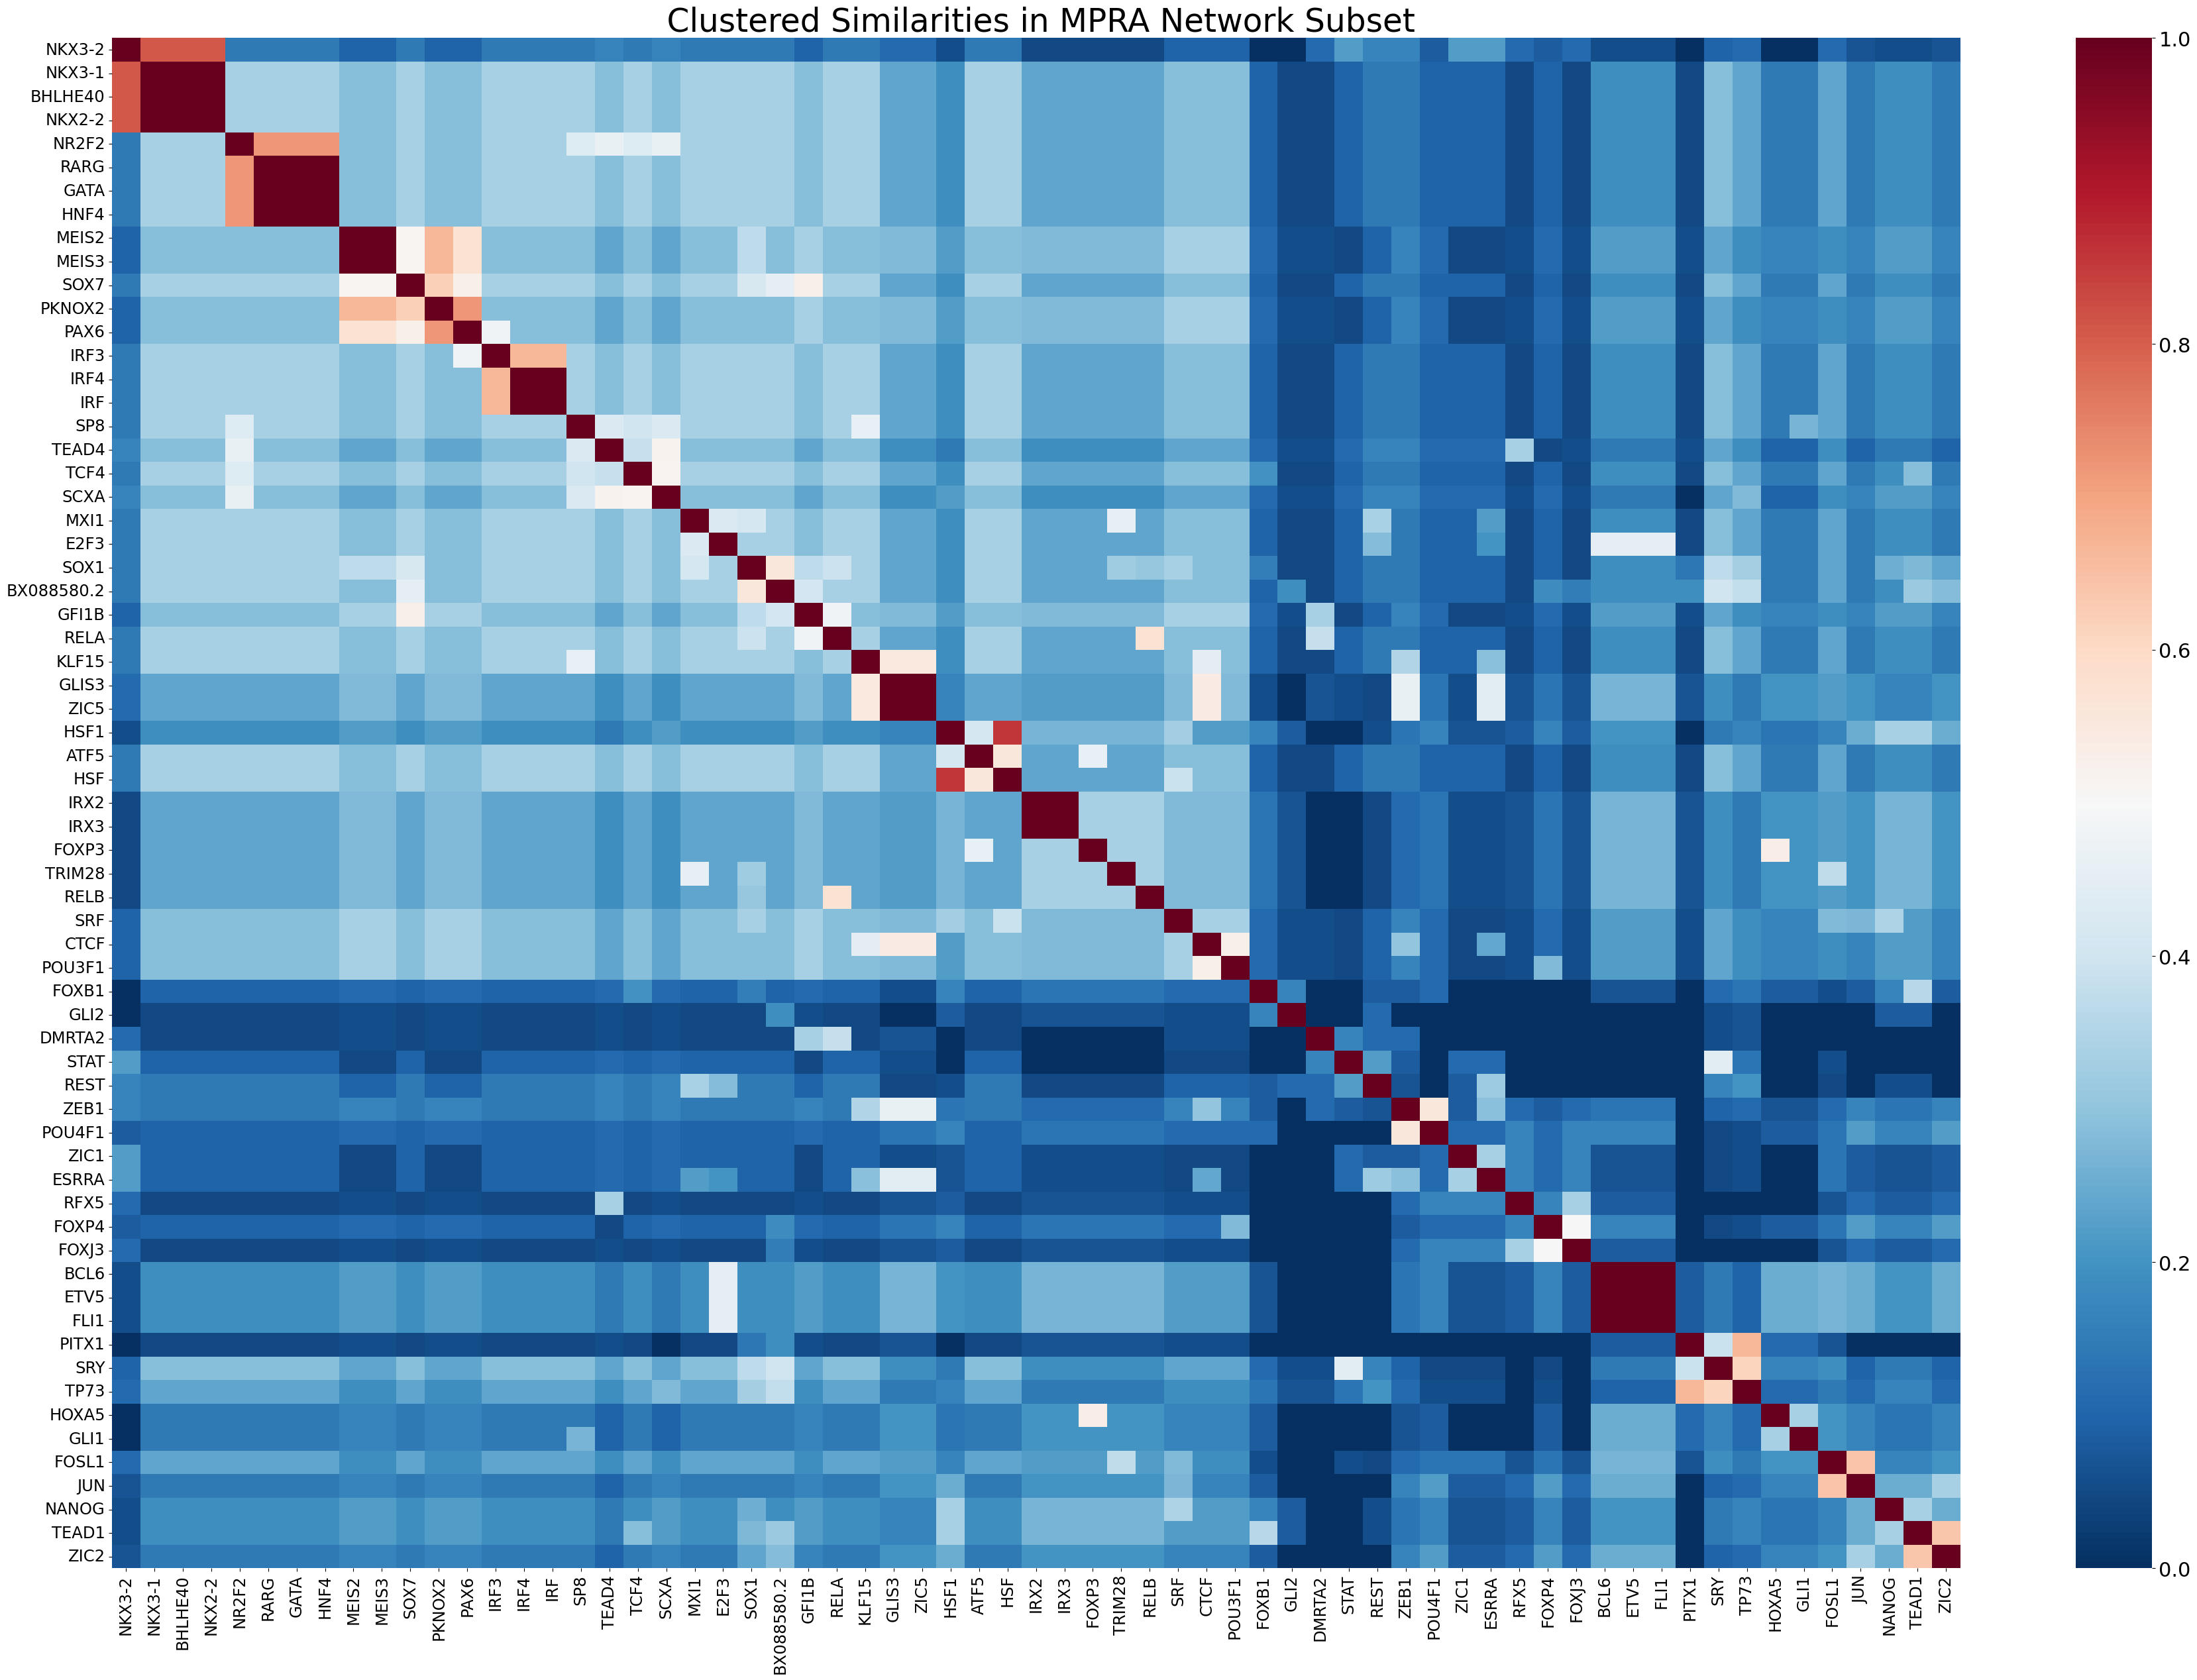

In [5]:
df = NW_subsetMPRA
tf_list = df['TF'].unique()

import numpy as np

# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    return intersection / union if union != 0 else 0

# Computing the Jaccard similarity for each pair of TFs
similarity_dict = {}

for i in range(len(tf_list)):
    for j in range(i+1, len(tf_list)):
        tf1, tf2 = tf_list[i], tf_list[j]

        # Subsetting the data for the two TFs
        tf1_data = df[df['TF'] == tf1]
        tf2_data = df[df['TF'] == tf2]

        # Calculate the Jaccard similarity for modules, genes, and samples
        mutual_modules = jaccard_similarity(set(tf1_data['Module']), set(tf2_data['Module']))
        mutual_genes = jaccard_similarity(set(tf1_data['Gene']), set(tf2_data['Gene']))
        mutual_samples = jaccard_similarity(set(tf1_data['Sample']), set(tf2_data['Sample']))

        # Save the results
        similarity_dict[(tf1, tf2)] = {
            'mutual_modules': mutual_modules,
            'mutual_genes': mutual_genes,
            'mutual_samples': mutual_samples
        }

for tf_pair, values in similarity_dict.items():
    # Compute the average of the three Jaccard scores
    similarity_score = np.mean(list(values.values()))

    similarity_dict[tf_pair]['similarity_score'] = similarity_score

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Initialize a matrix
similarity_matrix = np.zeros((len(tf_list), len(tf_list)))

# Fill the matrix with similarity scores
for tf_pair, values in similarity_dict.items():
    index_tf1 = np.where(tf_list == tf_pair[0])
    index_tf2 = np.where(tf_list == tf_pair[1])
    similarity_matrix[index_tf1, index_tf2] = values['similarity_score']
    similarity_matrix[index_tf2, index_tf1] = values['similarity_score']

from scipy.cluster.hierarchy import linkage, leaves_list

# Fill the diagonal with 1s
np.fill_diagonal(similarity_matrix, 1)

# Apply hierarchical clustering to arrange the rows and columns of the matrix
# 'ward' method is used to make the clusters as compact as possible
links = linkage(similarity_matrix, method='ward')

# Get the order of rows/columns after clustering
row_order = leaves_list(links)

# Reorder the matrix and labels
similarity_matrix = similarity_matrix[row_order, :]
similarity_matrix = similarity_matrix[:, row_order]
tf_list = tf_list[row_order]

# Create a heatmap with increased font size
plt.figure(figsize=(45, 30))
ax = sns.heatmap(similarity_matrix, xticklabels=tf_list, yticklabels=tf_list, cmap='RdBu_r', annot=False, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 17.5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 17.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 22)
ax.set_title(" Clustered Similarities in MPRA Network Subset", fontsize=35)

plt.show()

In [6]:
NW_bed = NW_subsetMPRA
NW_bed = NW_bed.drop('Sample', axis = 1)
NW_bed = NW_bed.drop('Module', axis = 1)
NW_bed = NW_bed.drop('Gene', axis = 1)
NW_bed = NW_bed.drop('TF', axis = 1)
NW_bed = NW_bed.drop('TFBS', axis = 1)
NW_bed = NW_bed.drop_duplicates()
NW_bed
NW_bed.to_csv('/home/wbd20/Kreimer_Lab/Network/MPRA_Network_Filtered_Regions.bed', sep ='\t', index = None, header = None)

In [7]:
# Matrix Manipulation/Management Libraries
import pandas as pd

# Data Visualization Libaries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Input/Output Libraries
import os
import subprocess

# Bioinformatics Libraries
import pybedtools

# Statistical Tests, Machine Learning, etc. Libraries
import igraph as ig

# Miscellaneous Libraries 
import time

In [8]:
NW_Filtered = NW_subsetMPRA

# Report Network Statistics

average_module_length = NW_Filtered['End'] - NW_Filtered['Start']
average_module_length = average_module_length.mean()

unique_modules = NW_Filtered['Module'].nunique()

unique_genes = NW_Filtered['Gene'].nunique()

gene_module_ratio = unique_genes / unique_modules

sample_counts = NW_Filtered['Sample'].value_counts()

sample_percentages = NW_Filtered['Sample'].value_counts(normalize = True) * 100

print("Average length of Module:", average_module_length)
print("Unique Modules:", unique_modules)
print("Unique Genes:", unique_genes)
print("Gene to Modules ratio:", gene_module_ratio)
print("Counts per sample:\n", sample_counts)
print("Counts per sample as a percent:\n", sample_percentages)

Average length of Module: 171.0
Unique Modules: 45
Unique Genes: 82
Gene to Modules ratio: 1.8222222222222222
Counts per sample:
 6h_sample     195
3h_sample     168
0h_sample     146
12h_sample    131
24h_sample    115
48h_sample     97
72h_sample     69
Name: Sample, dtype: int64
Counts per sample as a percent:
 6h_sample     21.172638
3h_sample     18.241042
0h_sample     15.852334
12h_sample    14.223670
24h_sample    12.486428
48h_sample    10.532030
72h_sample     7.491857
Name: Sample, dtype: float64


In [9]:
NW_subsetMPRA

,Chrom,Start,End,Module,Gene,TF,TFBS,Sample
0,chr9,32344650,32344821,Module_37310,ACO1,IRF3,IRF3_M5572_1.02,0h_sample
1,chr9,32344650,32344821,Module_37310,ACO1,IRF4,IRF4_M5573_1.02,0h_sample
2,chr9,32344650,32344821,Module_37310,ACO1,IRF,IRF_known14,0h_sample
3,chr9,71487183,71487354,Module_37526,CBWD6,CTCF,CTCF_M4592_1.02,0h_sample
4,chr9,71487183,71487354,Module_37526,FAM122A,CTCF,CTCF_M4592_1.02,0h_sample
...,...,...,...,...,...,...,...,...
916,chr20,34679567,34679738,Module_22766,EPB41L1,HSF,HSF_known3,24h_sample
917,chr20,34679567,34679738,Module_22766,EPB41L1,ATF5,ATF5_M2977_1.02,48h_sample
918,chr20,34679567,34679738,Module_22766,EPB41L1,HSF,HSF_known3,48h_sample
919,chr20,34679567,34679738,Module_22766,EPB41L1,ATF5,ATF5_M2977_1.02,72h_sample


In [10]:
hg19 = pd.read_csv('/home/wbd20/Kreimer_Lab/Network/Motifs/hg19_motifs.tsv', sep='\t')
hg19['motif_id'] = hg19['motif_id'].str.split('_').str.get(0)
hg19 = hg19[['motif_id', 'sequence_name']]
hg19 = hg19.drop_duplicates()
hg19 = hg19.rename(columns={'motif_id': 'TF'})
hg19[['Chrom', 'Start_End']] = hg19['sequence_name'].str.split(':', expand=True)
hg19[['End', 'Strand']] = hg19['Start_End'].str.split('(', expand=True)
hg19[['Start', 'End']] = hg19['End'].str.split('-', expand=True)
hg19 = hg19[[ 'Chrom', 'Start', 'End', 'TF']]
hg19 = hg19.drop_duplicates()

hg19

,Chrom,Start,End,TF
0,chr2,73510811,73512124,ZNF263
1,chr1,244211274,244212811,EGR3
2,chr14,104614953,104618130,ZNF263
3,chr17,63542076,63542947,RELA
4,chr1,244211274,244212811,SP9
...,...,...,...,...
359862,chr11,61582426,61583220,PAX9
359864,chr2,60777264,60778158,MGA
359865,chr9,90993873,90994695,ESR2
359869,chr19,13262242,13263032,TEAD1


In [11]:
encode = pd.read_csv('/home/wbd20/Kreimer_Lab/Network/Motifs/encode_motifs.tsv', sep='\t')
encode['motif_id'] = encode['motif_id'].str.split('_').str.get(0)
encode = encode[['motif_id', 'sequence_name']]
encode = encode.drop_duplicates()
encode = encode.rename(columns={'motif_id': 'TF'})
encode[['Chrom', 'Start_End']] = encode['sequence_name'].str.split(':', expand=True)
encode[['End', 'Strand']] = encode['Start_End'].str.split('(', expand=True)
encode[['Start', 'End']] = encode['End'].str.split('-', expand=True)
encode = encode[[ 'Chrom', 'Start', 'End', 'TF']]
encode = encode.drop_duplicates()

encode

,Chrom,Start,End,TF
0,chr14,21571789,21572429,EGR1
1,chr9,107730371,107731848,EGR1
2,chr6,52929540,52930663,EGR1
3,chr7,112090533,112091417,SETDB1
4,chr2,37551323,37552392,EGR1
...,...,...,...,...
284726,chr1,32705033,32706318,TFAP2
284730,chr15,35312153,35313178,FOXC1
284733,chr2,60777264,60778158,MGA
284734,chr6,151710666,151711938,PDX1


In [12]:
tfs = pd.concat([hg19, encode])
tfs = tfs.drop_duplicates()
tfs

,Chrom,Start,End,TF
0,chr2,73510811,73512124,ZNF263
1,chr1,244211274,244212811,EGR3
2,chr14,104614953,104618130,ZNF263
3,chr17,63542076,63542947,RELA
4,chr1,244211274,244212811,SP9
...,...,...,...,...
284723,chr14,65801387,65801887,RREB1
284725,chr19,54483400,54484752,RREB1
284726,chr1,32705033,32706318,TFAP2
284730,chr15,35312153,35313178,FOXC1


In [13]:
import pandas as pd

df1 = tfs
df2 = NW_subsetMPRA

# Convert columns to the appropriate types
df1[['Start', 'End']] = df1[['Start', 'End']].astype(int)
df2[['Start', 'End']] = df2[['Start', 'End']].astype(int)

# Rename the 'TF' columns in each data frame to distinguish between them
df1 = df1.rename(columns={'TF': 'TFs_FIMO'})
df2 = df2.rename(columns={'TF': 'TF_df2'})

# Merge the data frames on chromosome, keep every row (outer join)
merged_df = pd.merge(df1, df2, on='Chrom', how='outer', suffixes=('_df1', '_df2'))

# Find the overlapping regions
overlaps = (merged_df['Start_df1'] <= merged_df['End_df2']) & (merged_df['End_df1'] >= merged_df['Start_df2'])

# Filter the merged data frame to only include the overlapping regions
merged_df = merged_df[overlaps]

# Copy relevant columns into a new data frame
output_df = merged_df[['Chrom', 'Start_df1', 'End_df1', 'TFBS', 'TFs_FIMO', 'TF_df2', 'Sample', 'Module', 'Gene']].copy()

# Rename the columns
output_df.columns = ['Chrom', 'Start', 'End', 'TFBS', 'TFs_FIMO', 'TF', 'Sample', 'Module', 'Gene']

# Filter rows where 'Sample' is not NaN
output_df = output_df[output_df['Sample'].notna()]

# Reset the index
output_df = output_df[output_df['TFs_FIMO'] == output_df['TF']]
output_df = output_df.reset_index(drop=True)

In [14]:
output_df

,Chrom,Start,End,TFBS,TFs_FIMO,TF,Sample,Module,Gene
0,chr2,189168171,189168894,SOX1_M6129_1.02,SOX1,SOX1,0h_sample,Module_21471,GULP1
1,chr2,189168171,189168894,SOX1_M6134_1.02,SOX1,SOX1,0h_sample,Module_21471,GULP1
2,chr2,189168171,189168894,SOX1_M6475_1.02,SOX1,SOX1,0h_sample,Module_21471,GULP1
3,chr2,189168171,189168894,SOX1_M6129_1.02,SOX1,SOX1,3h_sample,Module_21471,GULP1
4,chr2,189168171,189168894,SOX1_M6134_1.02,SOX1,SOX1,3h_sample,Module_21471,GULP1
...,...,...,...,...,...,...,...,...,...
915,chr15,70391246,70392265,FOSL1_M6231_1.02,FOSL1,FOSL1,0h_sample,Module_12288,TLE3
916,chr15,70391246,70392265,FOSL1_M6231_1.02,FOSL1,FOSL1,3h_sample,Module_12288,TLE3
917,chr15,70391246,70392265,FOSL1_M6231_1.02,FOSL1,FOSL1,72h_sample,Module_12288,TLE3
918,chr15,59646130,59647268,IRF3_M5572_1.02,IRF3,IRF3,6h_sample,Module_12055,MYO1E


In [15]:
NW_Filtered = output_df

# Report Network Statistics

average_module_length = NW_Filtered['End'] - NW_Filtered['Start']
average_module_length = average_module_length.mean()

unique_modules = NW_Filtered['Module'].nunique()

unique_genes = NW_Filtered['Gene'].nunique()

gene_module_ratio = unique_genes / unique_modules

sample_counts = NW_Filtered['Sample'].value_counts()

sample_percentages = NW_Filtered['Sample'].value_counts(normalize = True) * 100

print("Average length of Module:", average_module_length)
print("Unique Modules:", unique_modules)
print("Unique Genes:", unique_genes)
print("Gene to Modules ratio:", gene_module_ratio)
print("Counts per sample:\n", sample_counts)
print("Counts per sample as a percent:\n", sample_percentages)

Average length of Module: 828.9358695652174
Unique Modules: 45
Unique Genes: 82
Gene to Modules ratio: 1.8222222222222222
Counts per sample:
 6h_sample     195
3h_sample     168
0h_sample     146
12h_sample    130
24h_sample    115
48h_sample     97
72h_sample     69
Name: Sample, dtype: int64
Counts per sample as a percent:
 6h_sample     21.195652
3h_sample     18.260870
0h_sample     15.869565
12h_sample    14.130435
24h_sample    12.500000
48h_sample    10.543478
72h_sample     7.500000
Name: Sample, dtype: float64
